In [31]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [7]:
# Load the image
image_path = "/content/jerry.png"
image = cv2.imread(image_path)

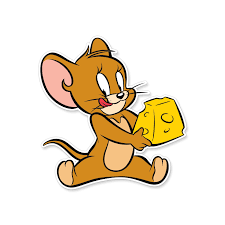

In [8]:
from google.colab.patches import cv2_imshow
cv2_imshow(image)

Text(0.5, 0.98, 'Comparision of BGR to RGB')

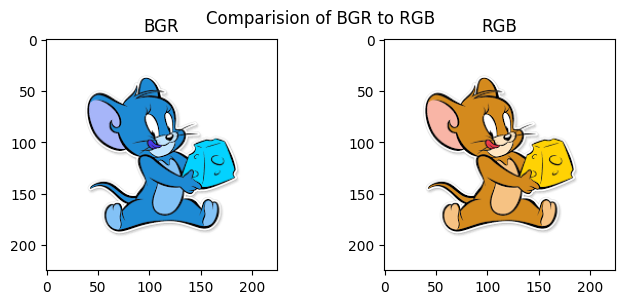

In [9]:
# Load the input image
image = cv2.imread('/content/jerry.png', cv2.IMREAD_COLOR)

fig,ax=plt.subplots(1,2,figsize=(8,3))
ax[0].imshow(image)
ax[0].set_title("BGR")
image2 = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
ax[1].imshow(image2)
ax[1].set_title("RGB")
fig.suptitle("Comparision of BGR to RGB")

In [12]:
# Crop the image to make it square
height, width = gray.shape
min_dim = min(height, width)
start_x = int((width - min_dim) / 2)
start_y = int((height - min_dim) / 2)
end_x = start_x + min_dim
end_y = start_y + min_dim
cropped = gray[start_y:end_y, start_x:end_x]

# Histogram

Text(0, 0.5, 'Frequency')

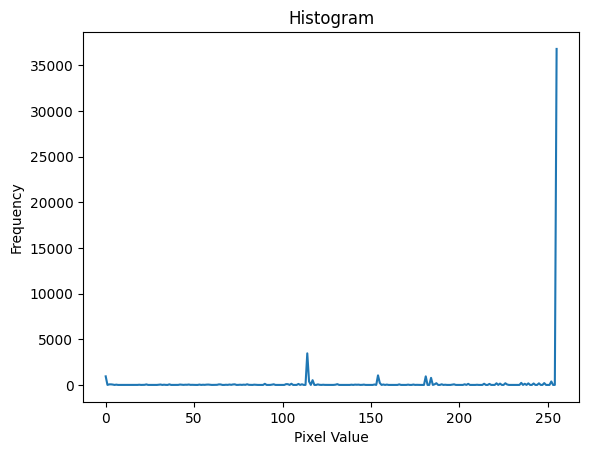

In [13]:
# Calculate and plot the histogram
histogram = cv2.calcHist([cropped], [0], None, [256], [0, 256])
plt.figure()
plt.plot(histogram)
plt.title("Histogram")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")

# Fourier Transform

Text(0.5, 1.0, 'Fourier Transform')

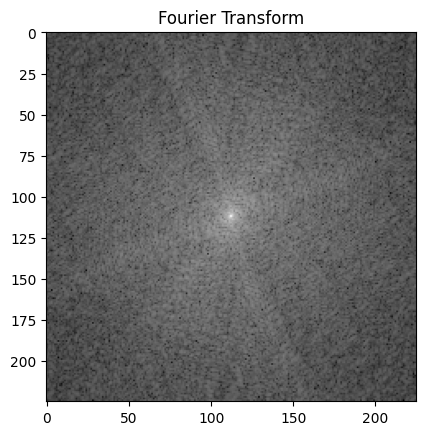

In [14]:
# Calculate and plot the Fourier transform
f = np.fft.fft2(cropped)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20 * np.log(np.abs(fshift))
plt.figure()
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title("Fourier Transform")

# Inverse Fourier Transform

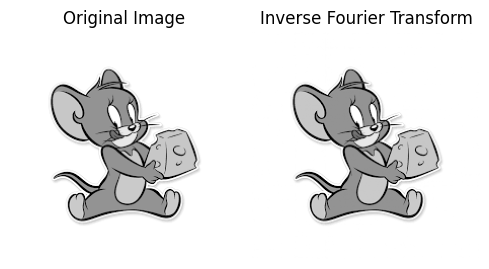

In [69]:


# Load the image
image_path = "/content/jerry.png"
image = cv2.imread(image_path, 0)  # Load as grayscale

# Perform Fourier transform
f = np.fft.fft2(image)
fshift = np.fft.fftshift(f)

# Apply inverse Fourier transform
inverse_fshift = np.fft.ifftshift(fshift)
inverse_f = np.fft.ifft2(inverse_fshift)
inverse_image = np.abs(inverse_f)

# Convert the inverse image to uint8
inverse_image = np.uint8(inverse_image)

# Display the original and inverse images
fig, axs = plt.subplots(1, 2, figsize=(5, 5))
axs[0].imshow(image, cmap="gray")
axs[0].set_title("Original Image")
axs[0].axis("off")
axs[1].imshow(inverse_image, cmap="gray")
axs[1].set_title("Inverse Fourier Transform")
axs[1].axis("off")

# Adjust the spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()


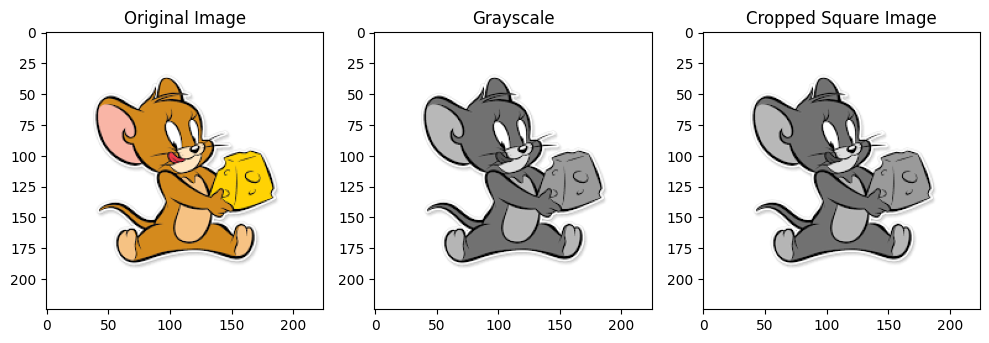

In [15]:
# Display the original, grayscale, and cropped images
plt.figure(figsize=(10, 4))
plt.subplot(131)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.subplot(132)
plt.imshow(gray, cmap='gray')
plt.title("Grayscale")
plt.subplot(133)
plt.imshow(cropped, cmap='gray')
plt.title("Cropped Square Image")

plt.tight_layout()
plt.show()

In [34]:
# Load the images
image_path = "/content/jerry.png"
image = cv2.imread(image_path)
flipped_horizontal = cv2.flip(image, 1)
flipped_vertical = cv2.flip(image, 0)

# Flipping of an Image

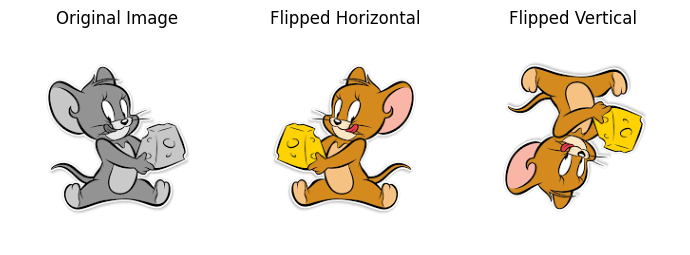

In [66]:

# Create a figure and subplot for displaying images
fig, axs = plt.subplots(1, 3, figsize=(7, 4))

# Display the original image with label
axs[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axs[0].set_title("Original Image")

# Display the horizontally flipped image with label
axs[1].imshow(cv2.cvtColor(flipped_horizontal, cv2.COLOR_BGR2RGB))
axs[1].set_title("Flipped Horizontal")

# Display the vertically flipped image with label
axs[2].imshow(cv2.cvtColor(flipped_vertical, cv2.COLOR_BGR2RGB))
axs[2].set_title("Flipped Vertical")

# Remove the axis labels
for ax in axs:
    ax.axis("off")

# Adjust the spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()


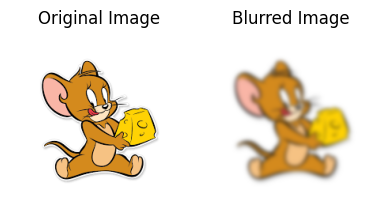

In [45]:
# Apply Gaussian blur
blurred_image = cv2.GaussianBlur(image, (15, 15), 0)

# Create a figure and subplots for displaying images
fig, axs = plt.subplots(1, 2, figsize=(4, 4))

# Display the original image with label
axs[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axs[0].set_title("Original Image")
axs[0].axis("off")

# Display the blurred image with label
axs[1].imshow(cv2.cvtColor(blurred_image, cv2.COLOR_BGR2RGB))
axs[1].set_title("Blurred Image")
axs[1].axis("off")

# Adjust the spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()

# Edge Detection

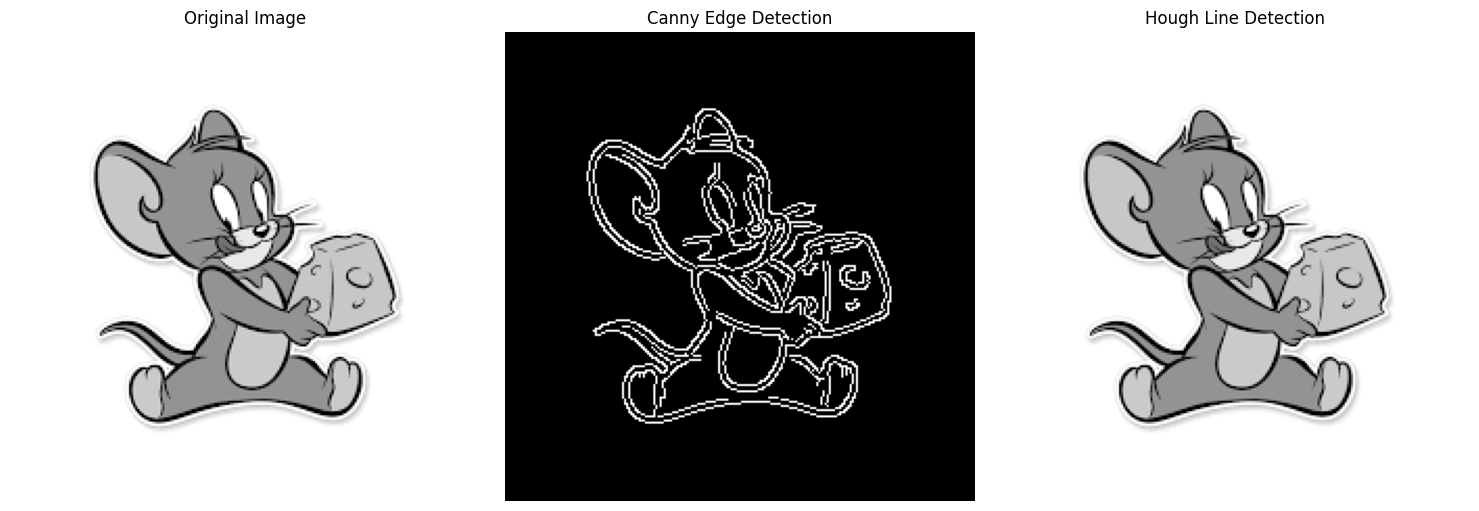

In [71]:

# Load the image
image_path = "/content/jerry.png"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply Gaussian blur
blurred = cv2.GaussianBlur(image, (5, 5), 0)

# Perform Canny edge detection
edges = cv2.Canny(blurred, 50, 150)

# Apply Hough line detection
lines = cv2.HoughLines(edges, 1, np.pi/180, threshold=100)

# Draw detected lines on the original image
result = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
if lines is not None:
    for line in lines:
        rho, theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(result, (x1, y1), (x2, y2), (0, 0, 255), 2)

# Display the original image, edges, and detected lines
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(image, cmap="gray")
axs[0].set_title("Original Image")
axs[0].axis("off")
axs[1].imshow(edges, cmap="gray")
axs[1].set_title("Canny Edge Detection")
axs[1].axis("off")
axs[2].imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
axs[2].set_title("Hough Line Detection")
axs[2].axis("off")

# Adjust the spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()


In [57]:
sigma = 1.0
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)

# 2D Gaussian Filter

In [58]:
def gaussian_2d(x, y, sigma):
    return (1 / (2 * np.pi * sigma**2)) * np.exp(-(x**2 + y**2) / (2 * sigma**2))

Z = gaussian_2d(X, Y, sigma)

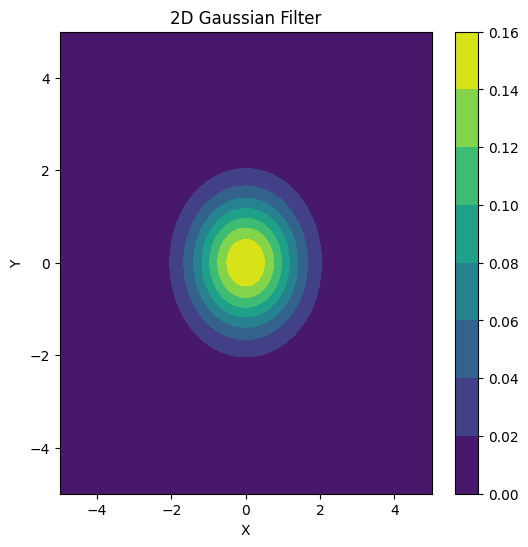

In [59]:
plt.figure(figsize=(6, 6))
plt.contourf(X, Y, Z, cmap='viridis')
plt.colorbar()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('2D Gaussian Filter')
plt.show()

# Derivative of Gaussian filter wrt x and y

In [60]:
def gaussian_derivative_x(x, y, sigma):
    return -(x / sigma**2) * gaussian_2d(x, y, sigma)

def gaussian_derivative_y(x, y, sigma):
    return -(y / sigma**2) * gaussian_2d(x, y, sigma)

In [61]:
dX = gaussian_derivative_x(X, Y, sigma)
dY = gaussian_derivative_y(X, Y, sigma)

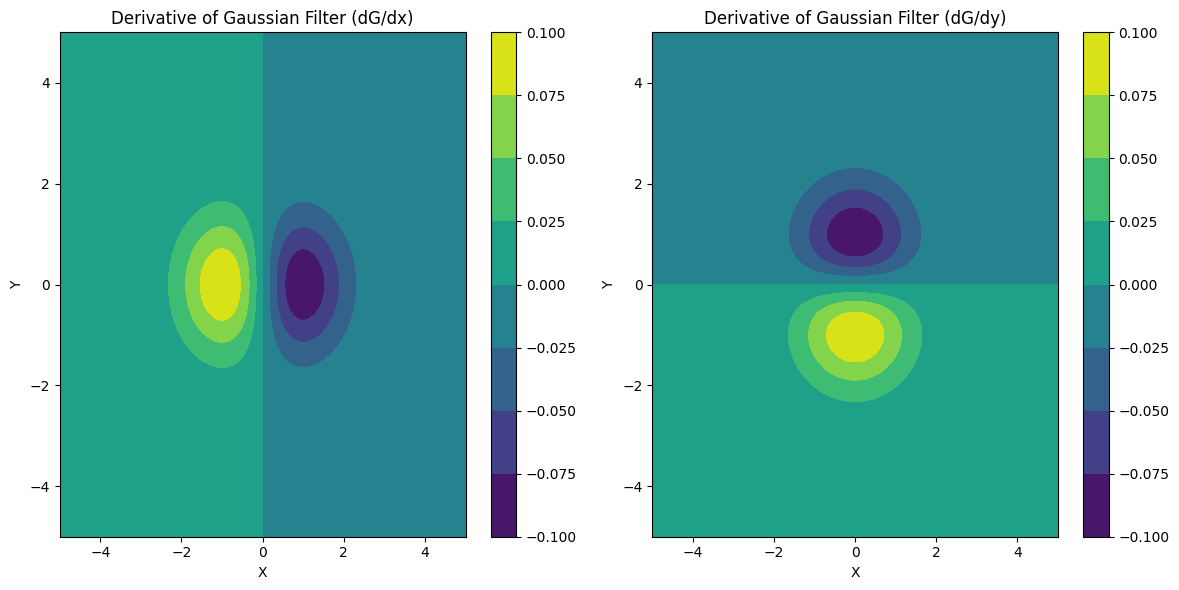

In [62]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.contourf(X, Y, dX, cmap='viridis')
plt.colorbar()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Derivative of Gaussian Filter (dG/dx)')

plt.subplot(1, 2, 2)
plt.contourf(X, Y, dY, cmap='viridis')
plt.colorbar()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Derivative of Gaussian Filter (dG/dy)')

plt.tight_layout()
plt.show()

# Laplacian of Gaussian

In [63]:
def laplacian_of_gaussian(x, y, sigma):
    return (1 / (np.pi * sigma**4)) * (1 - (x**2 + y**2) / (2 * sigma**2)) * np.exp(-(x**2 + y**2) / (2 * sigma**2))

In [64]:
Z = laplacian_of_gaussian(X, Y, sigma)

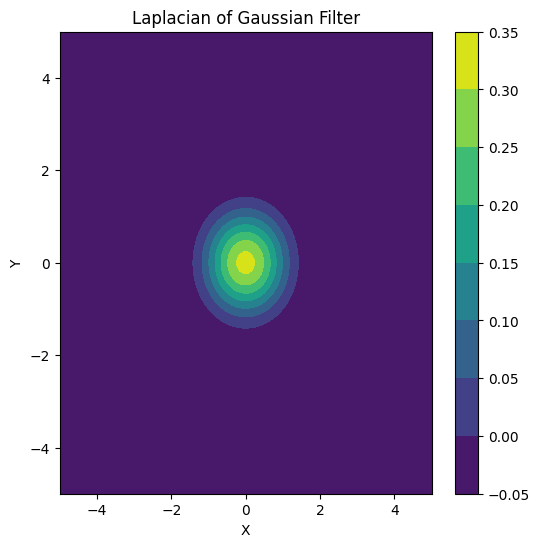

In [65]:
plt.figure(figsize=(6, 6))
plt.contourf(X, Y, Z, cmap='viridis')
plt.colorbar()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Laplacian of Gaussian Filter')
plt.show()